In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## This notebook creates histograms of various variables used as predictors by the random forest classifier (Fig. 4). Histograms depict distributions of these variables for EML cases only.

#### EML_May_2012_2021.csv contains 10 years (2012-2021) of EML data for the month of May only. Data are 6-hourly (0, 6, 12, 18 UTC).
 - 'eml' variable is binary, where 1=EML, 0=no EML. This is the variable we are trying to predict.
 - latitude, longitude, and time variables indicate when and where there is or isn't an EML.
 - all other variables are possible predictors for our ML model

In [2]:
# Open the CSV file containing the May 2012-2021 EML dataset
df = pd.read_csv('/home/scratch/mandrews/eae_598/EML_May_2012_2021.csv')
df.head()

,latitude,longitude,time,Z500,t500,wspd500,wdir500,mucape,mucin,mlcape,...,theta_850,theta_925,theta_sfc,t925,rh_sfc,rh_925,rh_850,rh_700,rh_500,rh_3_6km
0,26.0,253.00,2012-05-01 00:00:00,5.843171,-9.134342,5.660553,205.892493,0.0,0.0,0.0,...,NaN,NaN,313.883362,NaN,0.267810,NaN,NaN,0.448221,0.275484,0.199151
1,26.0,253.25,2012-05-01 00:00:00,5.843966,-9.297320,5.074431,202.685653,0.0,0.0,0.0,...,NaN,NaN,315.494537,NaN,0.253985,NaN,NaN,0.365675,0.325275,0.236668
2,26.0,253.50,2012-05-01 00:00:00,5.844372,-9.441615,5.426132,192.996072,0.0,0.0,0.0,...,NaN,NaN,316.565155,NaN,0.233949,NaN,NaN,0.309428,0.276469,0.241000
3,26.0,253.75,2012-05-01 00:00:00,5.846489,-9.879836,4.917766,180.679988,0.0,0.0,0.0,...,NaN,NaN,317.429565,NaN,0.219240,NaN,NaN,0.280152,0.366142,0.259380
4,26.0,254.00,2012-05-01 00:00:00,5.847194,-10.555432,3.565028,182.630536,0.0,0.0,0.0,...,NaN,NaN,318.495514,NaN,0.158403,NaN,NaN,0.231137,0.591805,0.389781


In [3]:
# This seperates the date column to get a new year column
df['year'] = [int(x.split('-')[0]) for x in df['time']]

# This seperates the date column to get a new hour column
df['hour'] = [str(x.split(' ')[1])[0:2] for x in df['time']]

# Change variable types to integers to make plotting easier
df['eml'] = df['eml'].astype(int)
df['hour'] = df['hour'].astype(int)

In [4]:
# Select all the EML cases in the dataset
emls = df[df['eml'] == 1]

# Select all the not EML cases in the dataset
no_emls = df[df['eml'] == 0]

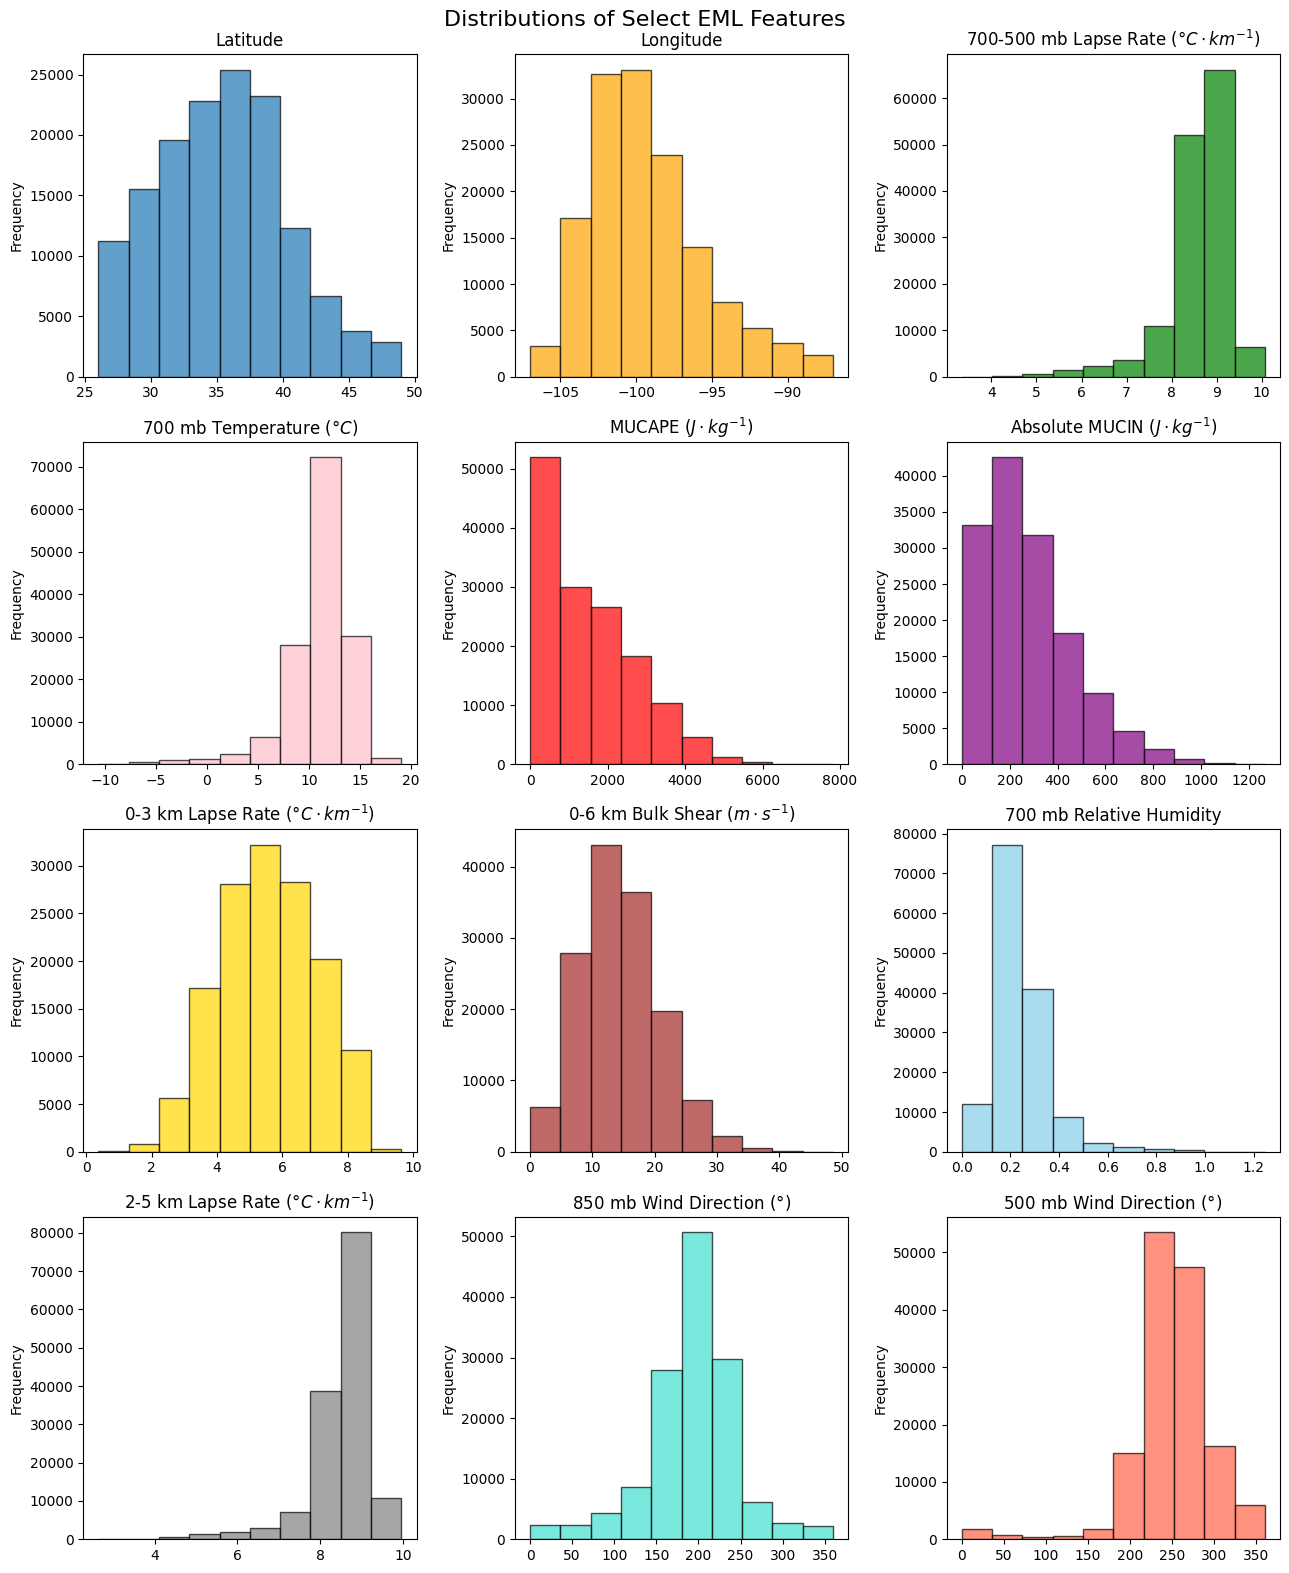

In [5]:
# Create histograms to look at the distributions of some variables in our EML dataset. Distributions are plotted for EML cases only (as opposed to non EML cases)
fig, axes = plt.subplots(4, 3, figsize=(13, 16))

# Adjust longitude from 0-360 to -180 to 180
longitude = (-1*(360 - emls['longitude']))

# Plot histograms of select EML variables
emls['latitude'].plot(kind='hist', ax=axes[0, 0], title='Latitude', alpha=0.7, edgecolor='black')
longitude.plot(kind='hist', ax=axes[0, 1], title='Longitude', alpha=0.7, color='orange', edgecolor='black')
emls['lr75'].plot(kind='hist', ax=axes[0, 2], title='700-500 mb Lapse Rate ($\degree C \cdot km^{-1}$)', alpha=0.7, color='green', edgecolor='black')
emls['t700'].plot(kind='hist', ax=axes[1, 0], title='700 mb Temperature ($\degree C$)', alpha=0.7, color='pink', edgecolor='black')
emls['mucape'].plot(kind='hist', ax=axes[1, 1], title='MUCAPE ($J \cdot kg^{-1}$)', alpha=0.7, color='red', edgecolor='black')
emls['mucin'].plot(kind='hist', ax=axes[1, 2], title='Absolute MUCIN ($J \cdot kg^{-1}$)', alpha=0.7, color='purple', edgecolor='black')
emls['lr03'].plot(kind='hist', ax=axes[2, 0], title='0-3 km Lapse Rate ($\degree C \cdot km^{-1}$)', alpha=0.7, color='gold', edgecolor='black')
emls['bs06'].plot(kind='hist', ax=axes[2, 1], title='0-6 km Bulk Shear ($m \cdot s^{-1}$)', alpha=0.7, color='brown', edgecolor='black')
emls['rh_700'].plot(kind='hist', ax=axes[2, 2], title='700 mb Relative Humidity', alpha=0.7, color='skyblue', edgecolor='black')
emls['lr25'].plot(kind='hist', ax=axes[3, 0], title='2-5 km Lapse Rate ($\degree C \cdot km^{-1}$)', alpha=0.7, color='grey', edgecolor='black')
emls['wdir850'].plot(kind='hist', ax=axes[3, 1], title='850 mb Wind Direction ($\degree$)', alpha=0.7, color='turquoise', edgecolor='black')
emls['wdir500'].plot(kind='hist', ax=axes[3, 2], title='500 mb Wind Direction ($\degree$) ', alpha=0.7, color='tomato', edgecolor='black')

plt.suptitle('Distributions of Select EML Features', fontsize=16)
plt.tight_layout()
plt.show()